In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats

In [2]:
import pandas as pd
tbl=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\MLE.xlsx')
tbl

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [3]:
import statsmodels.api as sm
x=tbl['X']
y=tbl['Y']
x2=sm.add_constant(x)
modl=sm.OLS(y,x2)
modl2=modl.fit()
modl2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00122
Time:                        17:35:21   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
e=modl2.resid

In [5]:
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [6]:
np.std(e)

0.6048820983804831

In [7]:
# estimating likelihood here m--> slope b--> intercept sigma standard deviation /
# L likelihood estimate for loop for multiplying all the terms 
def lik(parameters):    
    m=parameters[0]
    b=parameters[1]
    sigma=parameters[2]
    for i in np.arange(0,len(x)):
        y_exp=m*x+b
    L=(len(x)/2 *np.log(2*np.pi)*len(x)/2 * np.log(sigma**2)+1 /
          (2*sigma**2)*sum((y - y_exp)**2))
    return L
x=np.array([1,4,5,6,9])
y=np.array([2,6,7,9,15])
lik_model= minimize(lik,np.array([2,2,2]),method='L-BFGS-B')
        # np.array first one slope intercept and standard deviation 

In [8]:
lik_model

      fun: -17.578665889892132
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.56861201e-04, 5.40012479e-05, 2.63256084e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 112
      nit: 19
     njev: 28
   status: 0
  success: True
        x: array([ 1.61764701, -0.28823421, -0.28219012])

In [9]:
import pandas as pd
read=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\regcar.xlsx')
read

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [10]:
import statsmodels.api as sm
x=read['TV Ads']
y=read['car Sold']
x2=sm.add_constant(x)
modl=sm.OLS(y,x2)
modl2=modl.fit()
modl2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0190
Time:                        17:35:21   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# y=10+5x
e=modl2.resid

In [12]:
np.std(e)

1.6733200530681507

In [13]:
# estimating likelihood here m--> slope b--> intercept sigma standard deviation /
# L likelihood estimate for loop for multiplying all the terms 
def lik(parameters):    
    m=parameters[0]
    b=parameters[1]
    sigma=parameters[2]
    for i in np.arange(0,len(x)):
        y_exp=m*x+b
    L=(len(x)/2 *np.log(2*np.pi)*len(x)/2 * np.log(sigma**2)+1 /
          (2*sigma**2)*sum((y - y_exp)**2))
    return L
x=np.array([1,3,2,1,3])
y=np.array([14,24,18,17,27])
lik_model= minimize(lik,np.array([2,2,2]),method='Nelder-Mead')
        # np.array first one slope intercept and standard deviation 

In [14]:
lik_model.x

array([ 4.99999161, 10.0000057 , -0.78063487])

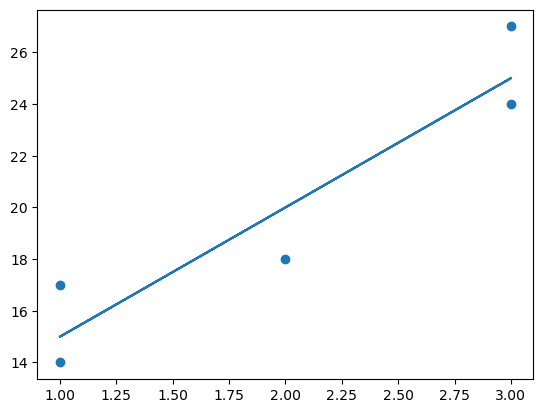

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,lik_model['x'][0]*x+lik_model['x'][1])
plt.show()

In [16]:
minimize?

In [17]:
brar=pd.read_excel('C:\\Users\\Arpit Akar\\Downloads\\Simmons.xls')
brar

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [18]:
x=brar[['Card','Spending']]
y=brar['Coupon']
import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.1012
Time:                        17:35:24   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

In [19]:
import scipy
from scipy.stats import chi2

In [20]:
chi2.pdf(13.628,2)
#p-value is ver low, so the model is significant

0.000549145469075383

In [21]:
""" p-value of card and spending is less than .05
so both variable are significant and thewhole model is also /
significant
"""

' p-value of card and spending is less than .05\nso both variable are significant and thewhole model is also /\nsignificant\n'

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

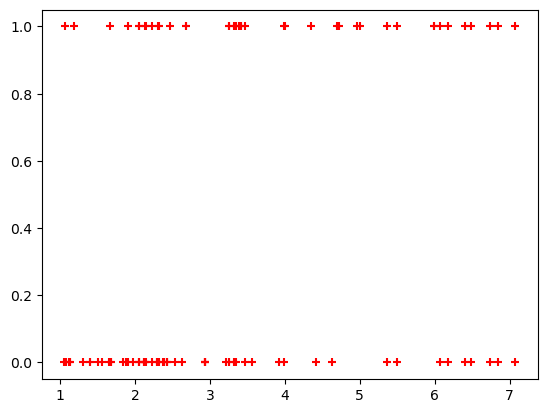

In [23]:
plt.scatter(brar.Spending,brar.Coupon,marker='+',color='red')

In [24]:
import scipy
from scipy.stats import chi2

In [25]:
chi2.pdf(13.628,2)

0.000549145469075383

In [26]:
brar.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [27]:
brar.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [28]:
brar['Coupon'].unique()

array([0, 1], dtype=int64)

In [29]:
brar['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
y=brar['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [33]:
Lreg= LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression()

In [ ]:
#constructing regression model

In [34]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [35]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [37]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [38]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,y_predict)

In [39]:
score

0.76

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [41]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print("True Negatives",tn)
print("False Negatives",fn)
print("True positives",tn)
print("False positives",fn)

True Negatives 15
False Negatives 5
True positives 15
False positives 5


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [ ]:
#default t value=0.5

In [43]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(accuracy))

Accuracy 0.76


In [44]:
speceficity=tn/(tn+fp)
print("specificity {:0.2f}".format(speceficity))

specificity 0.94


In [45]:
sensitivity=tp/(tp+fn)
print("sensitivity {:0.2f}".format(sensitivity))

sensitivity 0.44


In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_roc_auc1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

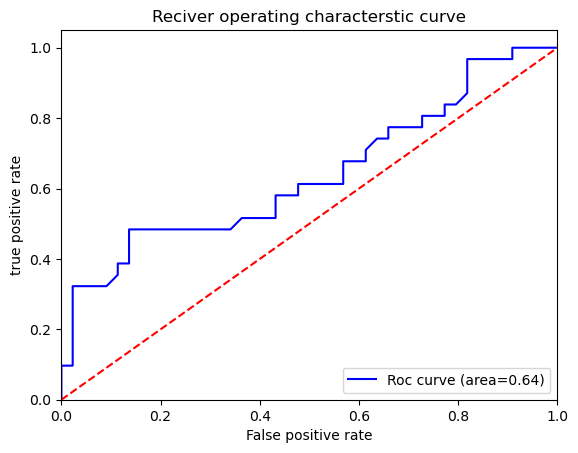

In [50]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='Roc curve (area=%0.2f)'% roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('Reciver operating characterstic curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
log_roc_auc1=roc_auc_score(y_test,y_predict)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc1=auc(fpr,tpr)

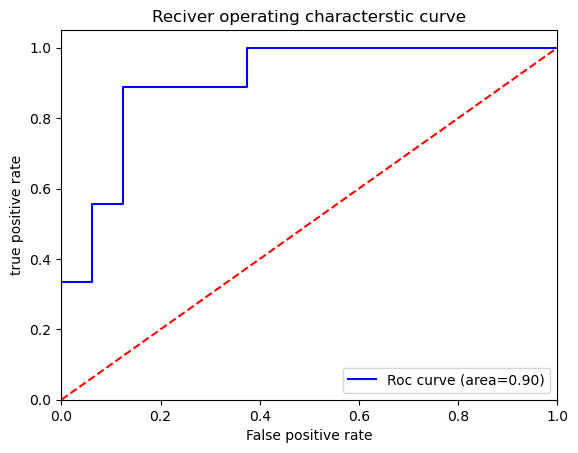

In [53]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label='Roc curve (area=%0.2f)'% roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('Reciver operating characterstic curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
fpr

array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.125 ,
       0.375 , 0.375 , 0.625 , 0.75  , 1.    ])

In [60]:
tpr

array([0.        , 0.11111111, 0.33333333, 0.33333333, 0.55555556,
       0.55555556, 0.66666667, 0.88888889, 0.88888889, 1.        ,
       1.        , 1.        , 1.        ])

In [58]:
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob.reshape(1,-1),0.35)[0]
y_predict_class1

TypeError: binarize() takes 1 positional argument but 2 were given

In [ ]:
#convert the array from float data type to integar data type
y_predict_class1=y_predict_class.astype(int)
y_predict_class1

In [ ]:
confusion_matrix_2=confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix_2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))